# Тестовое задание №1.

## Задача:

"Необходимо извлечь данные изображения таблицы, которые будут пригодны для вычислений. Например, нужно четко иметь данные по каждому свойству таблицы, понимать вложенность (индентацию) элемента то что это дочерний элемент. Например: в таблице есть Net sales, по product, по services - это разные значения, не нужно все свливать в одну кучу.
По средствам: язык: python, разрешается применять OpenSource библиотеки, предпочтительно pandas. Нельзя исопльзовать коммерческие решения (облачные тоже нельзя).
Задание может занять 4 часа. Может и больше в зависомости от квалификации. Единственное учитывайте общее количество потраченого времени на задачу (чтобы определить вашу производительность). Больше 2 дней точно перебор ее делать."

## Исходное изображение с данными:

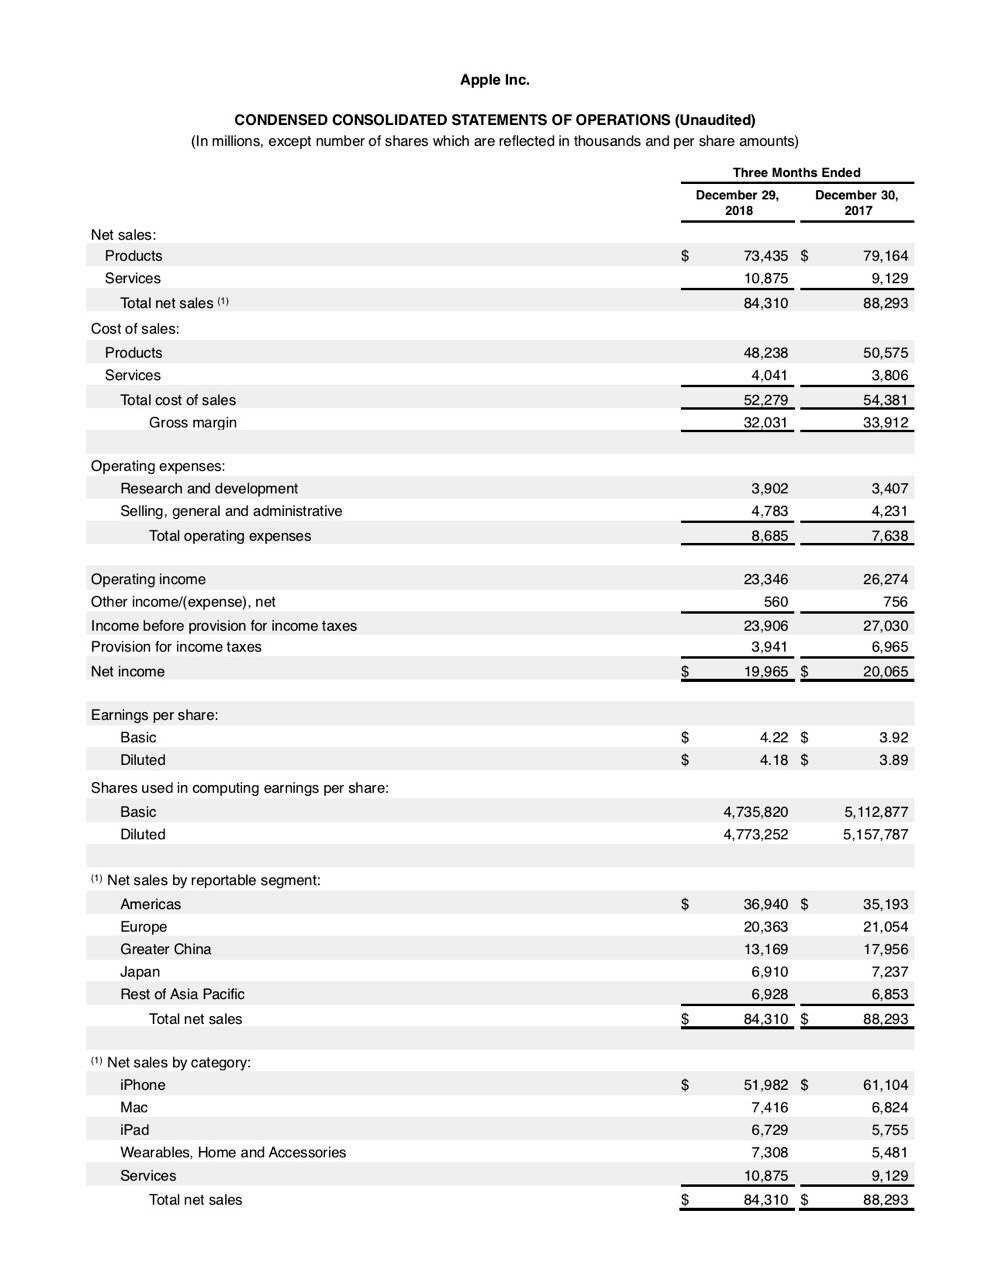

In [1]:
from PIL import Image
Image.open("photo.jpg")

# Погнали.
### Для начали немного обработаем исходное фото, чтобы распознать как можно больше данных.

In [2]:
import random
from PIL import ImageDraw #Подключим необходимые библиотеки. 

mode = int(input('mode:')) #Считываем номер преобразования. 
image = Image.open("photo.jpg") #Открываем изображение. 
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 	
pix = image.load() #Выгружаем значения пикселей.

mode:4


In [3]:
if (mode == 4):
	factor = int(input('factor:'))
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0] + factor
			b = pix[i, j][1] + factor
			c = pix[i, j][2] + factor
			if (a < 0):
				a = 0
			if (b < 0):
				b = 0
			if (c < 0):
				c = 0
			if (a > 255):
				a = 255
			if (b > 255):
				b = 255
			if (c > 255):
				c = 255
			draw.point((i, j), (a, b, c))

factor:-100


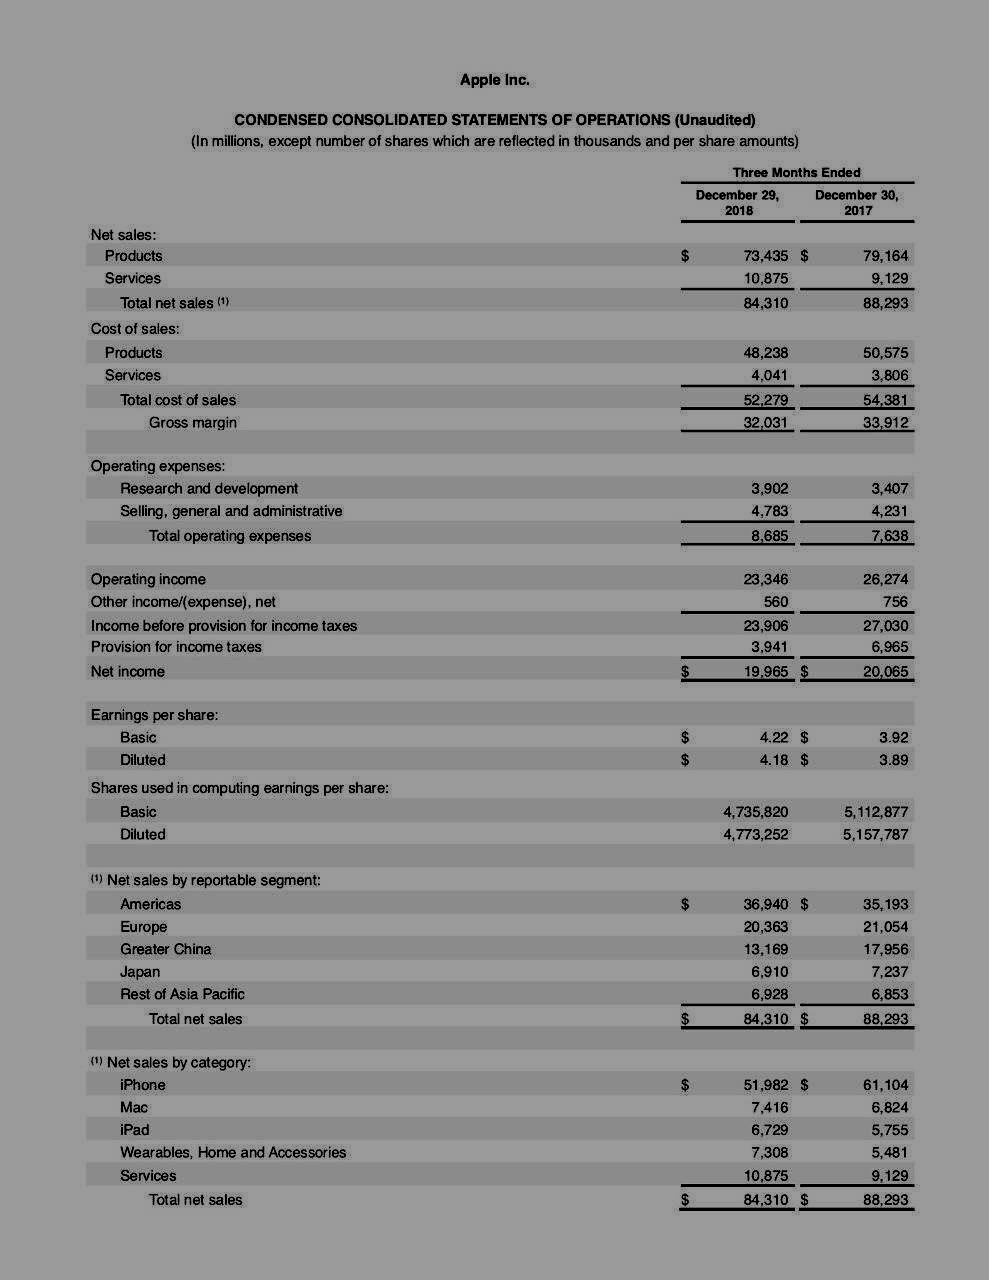

In [4]:
image

In [5]:
image.save("test.jpg", "JPEG")

### Подключим библиотеку для распознования текста. И применим её мощь.

In [6]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Users\\dmitry\\AppData\\Local\\Tesseract-OCR\\tesseract.exe'

In [7]:
text = pytesseract.image_to_string(Image.open("test.jpg"))

In [8]:
print(text)

Apple Inc,
CONDENSED CONSOLIDATED STATEMENTS OF OPERATIONS (Unaudited)
(In millions, except number of shares which are reflected in thousands and per share amounts)

‘Three Months Ended
December 28, December 30,

 

2018 2017
Net sales:
Products $ 73,435 $ 79,164
Services 10,875 9,129
Total net sales 84,310 88,203
Cost of sales:
Products 48,238 50,575
Services 4,041 3,806
Total cost of sales 52.279 54,381
Gross margin 32,031 33,912
Operating expenses:
Research and development 3,902 3,407
Selling, general and administrative 4,783 4,231
Total operating expenses 8,685 7,638
Operating income 23,346 26,274
Other income/(expense), net 560 756
Income before provision for income taxes 23,906 27,030
Provision for income taxes 3,941 6,965
Net income $ 19,965 $ 20,065
Earnings per share:
Basic $ 422 § 3.92
Diluted $ 418 $ 3.89
‘Shares used in computing earnings per share:
Basic 4,735,820 5,112,877
Diluted 4,773,252 5,157,787
‘*) Net sales by reportable segment:
Americas $ 36,940 $ 35,193
Europe 2

### Вполне неплохо. Сохраним результат в файл.

In [9]:
with open('text_photo.txt', 'w', encoding="utf-8") as f:
    f.write(text)
f.close()

### Удалим руками ненужный текст и оставим только данные для дальнейшей работы. Загрузим файл.

In [10]:
import codecs

In [11]:
file = codecs.open( "text_photo4.txt", "r", "utf-8" )
data = file.read()

### Определим наши данные в раздельные списки.

In [12]:
import re
x = re.sub(' ', '!', data)
data2 = x.split()

In [13]:
i = 0
newlist = []
newlist2 = []
newlist3 = []
newlist4 = []
newlist5 = []
z = []
k = 0

In [14]:
for i in data2:
    y = re.sub('!', ' ', i)
    q = y.split()
    if re.search(r'\b:', y):
        newlist.append(y)
        newlist5.append(k)
        k += 1
    else:
        k += 1
        if q[-2] == '$' or q[-2] == '§':
            newlist2.append(q[-1])
            newlist3.append(q[-3])
            newlist4.append(' '.join(q[:-4]))
        else:
            newlist2.append(q[-1])
            newlist3.append(q[-2])
            newlist4.append(' '.join(q[:-2]))

### Приведём все наши числа к одному разделителю (.) для удобства работы.

In [15]:
newlist6 = []
newlist7 = []

In [16]:
for i in newlist2:
    p = re.sub(',', '.', i)
    newlist6.append(p)
    
for i in newlist3:
    k = re.sub(',', '.', i)
    newlist7.append(k)

### Добавим в наши списки название колонок с данными.

In [17]:
newlist8 = [' ']

In [18]:
i = 0
while i < len(newlist):
    newlist4.insert(newlist5[i], newlist[i])
    newlist6.insert(newlist5[i], newlist8[0])
    newlist7.insert(newlist5[i], newlist8[0])
    i += 1

### Сохраним все наши списки с данными в таблицу для удобной работы.

In [19]:
import pandas as pd

In [20]:
frame = pd.DataFrame(newlist6)
frame.columns = ['December 30, 2017']
frame.insert(frame.shape[1]-1, 'Name', newlist4)
frame.insert(frame.shape[1]-1, 'December 29, 2018', newlist7)

frame.to_csv('pred2.csv',index=False)

### Загрузим нашу таблицу и посмотрим, что мы в итоге нарешали.

In [21]:
df = pd.read_csv('pred2.csv', header = 0, sep = ',')

In [22]:
df

,Name,"December 29, 2018","December 30, 2017"
0,Net sales:,,
1,Products,73.435,79.164
2,Services,10.875,9.129
3,Total net sales,84.310,88.203
4,Cost of sales:,,
5,Products,48.238,50.575
6,Services,4.041,3.806
7,Total cost of sales,52.279,54.381
8,Gross margin,32.031,33.912
9,Operating expenses:,,


## Красотенюшка! Отличная работа.

### good boy. goodbye.